In [1]:
import pandas as pd
cox = pd.read_excel("C:/Users/ANUSKA MAITY/Downloads/Cox Data Final.xlsx")

In [2]:
word_counts = cox.groupby('stim.string.left')['subject'].count()

# Filter the word counts to get words with count > 30
words_count_gt_30 = word_counts[word_counts > 30]

# Get the count of such words
count_gt_30 = len(words_count_gt_30)

# Print the count
print(count_gt_30)

359


In [3]:
df_filtered = cox.groupby("stim.string.left").filter(lambda x: len(x) >= 30)

In [4]:
words_count_gt_30_df = words_count_gt_30.reset_index(name='count')
df_filtered = cox[cox['stim.string.left'].isin(words_count_gt_30_df['stim.string.left'])]

In [5]:
participant_list = df_filtered.subject.unique().tolist()
cue_list = df_filtered['stim.string.left'].unique().tolist()

In [16]:
len(participant_list)

462

In [6]:
df_filtered['resp.type.rescore'] = df_filtered['resp.type.rescore'].apply(lambda x: 1 if x == 'Hit' else 0)

C:\Users\ANUSKA MAITY\AppData\Local\Temp\ipykernel_4048\3147710890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['resp.type.rescore'] = df_filtered['resp.type.rescore'].apply(lambda x: 1 if x == 'Hit' else 0)


In [7]:
mem_target_df = pd.DataFrame()
mem_cue_df = pd.DataFrame()

coeff_list = []
shuffled_coeff_list = []
p_value_list = []
coeff_list_2 = []
p_value_list_new = []

In [ ]:
import random
from scipy.stats import spearmanr
from statistics import mean
from matplotlib import pyplot as plt

In [18]:
total_iterations = 5000

for _ in range(total_iterations):
    # Randomly select 231 participants
    selected_participants = random.sample(participant_list, 231)
    
    # Filter df_filtered based on selected participants
    df_selected = df_filtered[df_filtered['subject'].isin(selected_participants)]

    matrix_target = df_selected.pivot_table(index='stim.string.right', columns='subject', values='resp.type.rescore', aggfunc='mean')

    # If you want NaN for missing values, you can replace any missing values with NaN
    matrix_target = matrix_target.fillna(value=pd.NA)

    # If you want to reset the index to have 'cue' as a regular column (optional)
    matrix_target = matrix_target.reset_index()

    # Display the resulting matrix
    #print(matrix)


    matrix_cue = df_selected.pivot_table(index='stim.string.left', columns='subject', values='resp.type.rescore', aggfunc='mean')

    # If you want NaN for missing values, you can replace any missing values with NaN
    matrix_cue = matrix_cue.fillna(value=pd.NA)

    # If you want to reset the index to have 'cue' as a regular column (optional)
    matrix_cue = matrix_cue.reset_index()




    target_column = matrix_target[matrix_target.columns[0]]
    cue_column =  matrix_cue[matrix_cue.columns[0]]



## Calculate the average value across participants for each target for parts A and B
    mem_target_df = matrix_target.iloc[:, 1:].mean(axis=1).to_frame()
    mem_target_df.columns = ['Target Memorability']

    # Add the target column to df
    mem_target_df['Target'] = matrix_target[matrix_target.columns[0]]

    # Reorder the columns
    mem_target_df = mem_target_df[['Target', 'Target Memorability']]

#---------------------------------------------------------------------------------------------------------------------------#

## Calculate the average value across participants for each cue
    mem_cue_df = matrix_cue.iloc[:, 1:].mean(axis=1).to_frame()
    mem_cue_df.columns = ['Cue Memorability']

    # Add the target column to df
    mem_cue_df['Cue'] = matrix_cue[matrix_cue.columns[0]]

    # Reorder the columns
    mem_cue_df = mem_cue_df[['Cue', 'Cue Memorability']]



## Get the common words & filter the dfs
    common_words = set(mem_target_df['Target']).intersection(mem_cue_df['Cue'])

    # Filter mem_target_df to keep only the common words
    mem_target_df = mem_target_df[mem_target_df['Target'].isin(common_words)]
    # mem_target_df_B = mem_target_df_B[mem_target_df_B['Target'].isin(common_words)]

    # Filter mem_cue_df to keep only the common words
    mem_cue_df = mem_cue_df[mem_cue_df['Cue'].isin(common_words)]

    mem_shuffled_df = mem_cue_df.sample(frac=1)
  


    # Convert mem_target_df to a numpy array
    mem_target_array = mem_target_df['Target Memorability'].to_numpy()
    #mem_target_array_B = mem_target_df_B['Memorability'].to_numpy()

    # Convert mem_cue_df to a numpy array
    mem_cue_array = mem_cue_df['Cue Memorability'].to_numpy()

    mem_shuffled_array = mem_shuffled_df['Cue Memorability'].to_numpy()
  


# ## Calculate Spearman Brown coefficient across Cue & Target arrays
    corr_coeff, p_value = spearmanr(mem_cue_array, mem_target_array)
    coeff_list.append(corr_coeff)
    p_value_list.append(p_value)


    corr_coeff_s, p_value_s = spearmanr(mem_shuffled_array, mem_target_array)
    shuffled_coeff_list.append(corr_coeff_s)
    p_value_list_new.append(p_value_s)

In [7]:
# matrix_target = df_filtered.pivot_table(index='stim.string.right', columns='subject', values='resp.type.rescore', aggfunc='mean')

# # If you want NaN for missing values, you can replace any missing values with NaN
# matrix_target = matrix_target.fillna(value=pd.NA)

# # If you want to reset the index to have 'cue' as a regular column (optional)
# matrix_target = matrix_target.reset_index()

# # Display the resulting matrix
# #print(matrix)


# matrix_cue = df_filtered.pivot_table(index='stim.string.left', columns='subject', values='resp.type.rescore', aggfunc='mean')

# # If you want NaN for missing values, you can replace any missing values with NaN
# matrix_cue = matrix_cue.fillna(value=pd.NA)

# # If you want to reset the index to have 'cue' as a regular column (optional)
# matrix_cue = matrix_cue.reset_index()

In [8]:
# num_iterations = 2000

# mem_target_df = pd.DataFrame()
# mem_cue_df = pd.DataFrame()

# coeff_list = []
# shuffled_coeff_list = []
# p_value_list = []
# coeff_list_2 = []
# p_value_list_new = []

In [10]:
# for i in range(num_iterations):

#     target_column = matrix_target[matrix_target.columns[0]]
#     cue_column =  matrix_cue[matrix_cue.columns[0]]



# ## Calculate the average value across participants for each target for parts A and B
#     mem_target_df = matrix_target.iloc[:, 1:].mean(axis=1).to_frame()
#     mem_target_df.columns = ['Target Memorability']

#     # Add the target column to df
#     mem_target_df['Target'] = matrix_target[matrix_target.columns[0]]

#     # Reorder the columns
#     mem_target_df = mem_target_df[['Target', 'Target Memorability']]

# #---------------------------------------------------------------------------------------------------------------------------#

# ## Calculate the average value across participants for each cue
#     mem_cue_df = matrix_cue.iloc[:, 1:].mean(axis=1).to_frame()
#     mem_cue_df.columns = ['Cue Memorability']

#     # Add the target column to df
#     mem_cue_df['Cue'] = matrix_cue[matrix_cue.columns[0]]

#     # Reorder the columns
#     mem_cue_df = mem_cue_df[['Cue', 'Cue Memorability']]



# ## Get the common words & filter the dfs
#     common_words = set(mem_target_df['Target']).intersection(mem_cue_df['Cue'])

#     # Filter mem_target_df to keep only the common words
#     mem_target_df = mem_target_df[mem_target_df['Target'].isin(common_words)]
#     # mem_target_df_B = mem_target_df_B[mem_target_df_B['Target'].isin(common_words)]

#     # Filter mem_cue_df to keep only the common words
#     mem_cue_df = mem_cue_df[mem_cue_df['Cue'].isin(common_words)]

#     mem_shuffled_df = mem_cue_df.sample(frac=1)
  


#     # Convert mem_target_df to a numpy array
#     mem_target_array = mem_target_df['Target Memorability'].to_numpy()
#     #mem_target_array_B = mem_target_df_B['Memorability'].to_numpy()

#     # Convert mem_cue_df to a numpy array
#     mem_cue_array = mem_cue_df['Cue Memorability'].to_numpy()

#     mem_shuffled_array = mem_shuffled_df['Cue Memorability'].to_numpy()
  


# # ## Calculate Spearman Brown coefficient across Cue & Target arrays
#     corr_coeff, p_value = spearmanr(mem_cue_array, mem_target_array)
#     coeff_list.append(corr_coeff)
#     p_value_list.append(p_value)


#     corr_coeff_s, p_value_s = spearmanr(mem_shuffled_array, mem_target_array)
#     shuffled_coeff_list.append(corr_coeff_s)
#     p_value_list_new.append(p_value_s)

In [19]:
mean(coeff_list)

0.2020694435130972

In [20]:
mean(shuffled_coeff_list)

0.0002901817884991253

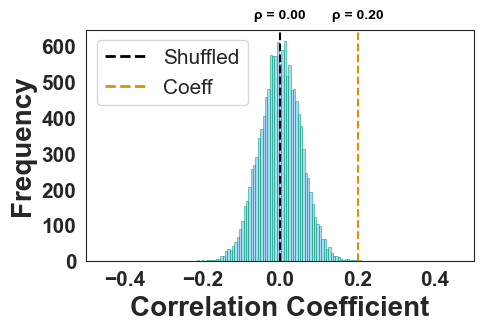

In [21]:
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set the font family
rcParams['font.family'] = 'Arial'

# Set the color palette for color-blind-friendly colors
colors = sns.color_palette("colorblind")

# Set the image width to 90mm

# Create the plot
plt.figure(figsize=(5, 3))  # Set figure size before any plotting commands
sns.set_style("white")
sns.histplot(shuffled_coeff_list, color=colors[9], edgecolor=colors[2], kde=False, alpha=0.5)
# sns.histplot(coeff_list, color=colors[1], edgecolor=colors[5], kde=True, alpha=0.5)
plt.xlim(-0.5,0.5)

# # Calculate and plot mean lines
mean_shuffled = sum(shuffled_coeff_list) / len(shuffled_coeff_list)
mean_coeff = sum(coeff_list) / len(coeff_list)
plt.axvline(x=mean_shuffled, color='black', linestyle='dashed', label=f"Mean Shuffled = {mean_shuffled:.2f}")
plt.axvline(x=mean_coeff, color=colors[1], linestyle='dashed', label=f"Mean Coeff = {mean_coeff:.2f}")

# # Annotate mean values outside the plot
plt.text(mean_shuffled, plt.ylim()[1]*1.05, f"ρ = {mean_shuffled:.2f}", color='black', ha='center', fontweight='bold')
plt.text(mean_coeff, plt.ylim()[1]*1.05, f"ρ = {mean_coeff:.2f}", color='black', ha='center', fontweight='bold')

# Set labels and tick fonts
plt.xlabel('Correlation Coefficient', fontsize=20, fontweight='bold')
plt.ylabel('Frequency', fontsize=20, fontweight='bold')
plt.xticks(fontsize=15, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='black', linestyle='dashed', lw=2, label='Shuffled'),
    Line2D([0], [0], color=colors[1], linestyle='dashed', lw=2, label='Coeff')
]

# Add legend
plt.legend(handles=legend_elements, fontsize=15)

plt.savefig("C:/Users/ANUSKA MAITY/Downloads/Python Photos/CT Split Half.eps", format="pdf", bbox_inches="tight", backend="cairo")
plt.show()

In [22]:
with open('C:/Users/ANUSKA MAITY/Downloads/cue_target_list.txt', 'w') as f:
    for item in coeff_list:
        f.write("%s\n" % item)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# file_path = '/content/drive/My Drive/cue_cue_list.txt'
# with open(file_path, 'r') as f:
my_list_cue =  pd.read_csv("C:/Users/ANUSKA MAITY/Downloads/cue_cue_list.txt", sep=" ", header=None)
my_list_target = pd.read_csv("C:/Users/ANUSKA MAITY/Downloads/target_target_list.txt", sep=" ", header=None)
my_list = pd.read_csv("C:/Users/ANUSKA MAITY/Downloads/cue_target_list.txt", sep=" ", header=None)

lst_cue = my_list_cue.values.tolist()
lst_target = my_list_target.values.tolist()
lst = my_list.values.tolist()

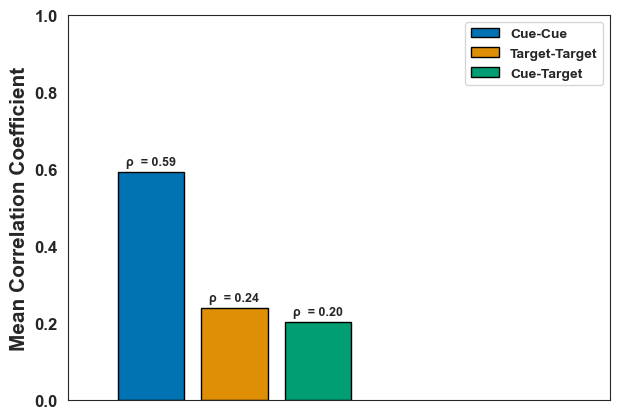

In [24]:
mean_values = [np.mean(lst_cue), np.mean(lst_target), np.mean(lst)]

colors = sns.color_palette("colorblind")
plt.figure(figsize=(7, 5))

# Create a bar plot with three bars for the mean values
bars = plt.bar([1, 2, 3], mean_values, color=colors, edgecolor='black')

# Create a legend with the x labels
plt.legend(bars, ['Cue-Cue', 'Target-Target', 'Cue-Target'], prop={'weight':'bold'}, fontsize = 20)

plt.xlim(0, 6.5)
plt.ylim(0, 1.0)
plt.xticks([])
plt.yticks(fontsize=12, fontweight='bold')
plt.ylabel('Mean Correlation Coefficient', fontweight='bold', fontsize = 15)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f"ρ  = {mean_values[i]:.2f}",
             ha='center', va='bottom', fontsize=9, fontweight='bold')


plt.savefig("C:/Users/ANUSKA MAITY/Downloads/Python Photos/CC TT CT.eps", format="pdf", bbox_inches="tight", backend="cairo")

plt.show()

In [29]:
from scipy import stats

# Assuming your DataFrame is named 'df'

# Group by the 'stim.string.left' column and count unique 'subject' values for each word
word_subject_counts = df_filtered.groupby('stim.string.left')['subject'].count()

# Calculate the mean number of subjects per word
mean_subjects_per_word = word_subject_counts.mean()

# Calculate the SEM (Standard Error of the Mean)
sem_subjects_per_word = stats.sem(word_subject_counts)

print(f"Mean number of subjects per word: {mean_subjects_per_word}")
print(f"SEM of subjects per word: {sem_subjects_per_word}")


Mean number of subjects per word: 34.540389972144844
SEM of subjects per word: 0.16580330452547679


In [ ]:
# Assuming your DataFrame is named 'df'

# Group by the 'stim.string.left' column and count unique 'subject' values for each word
word_subject_counts = df_filtered.groupby('stim.string.right')['subject'].count()

# Calculate the mean number of subjects per word
mean_subjects_per_word = word_subject_counts.mean()

# Calculate the SEM (Standard Error of the Mean)
sem_subjects_per_word = stats.sem(word_subject_counts)

print(f"Mean number of subjects per word: {mean_subjects_per_word}")
print(f"SEM of subjects per word: {sem_subjects_per_word}")
